Importing the Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [64]:
#Loading csv into pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [65]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [66]:
#Print the last 5 rows of the dataframe
gold_data.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [67]:
#Number of rows and columns
gold_data.shape

(2290, 6)

In [68]:
#Basic info on the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [69]:
#Checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [70]:
#Getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1.   Positive correlation
2.   Negative correlation

In [71]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

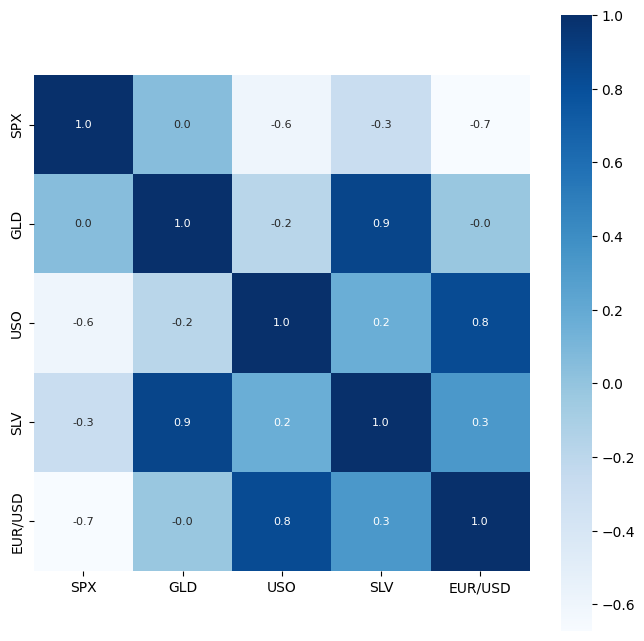

In [72]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [73]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


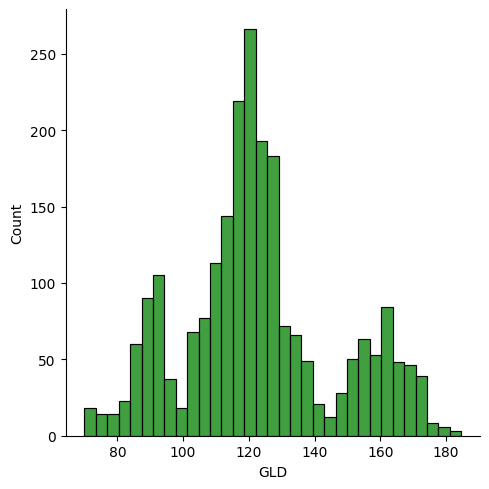

In [74]:
#Checking the distribution
sns.displot(gold_data['GLD'], color='green')

Splitting the Features and Target

In [75]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [76]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [77]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training: Random Forest Regressor

In [79]:
regressor = RandomForestRegressor(n_estimators=100)

In [80]:
#Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [84]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [82]:
print(tes_data_prediction)

[168.42369936  82.24489973 116.04590053 127.69180075 120.72620133
 154.85249771 150.79209891 126.14420041 117.54339873 125.88380096
 116.78790088 171.25750059 141.72789874 167.95449809 115.2479998
 117.33140048 138.6461032  169.91610073 159.32750294 158.85550037
 155.1791003  124.99219985 176.50539956 157.10260287 125.26310054
  94.03649977  77.35889988 120.61670036 119.11609937 167.39510027
  88.22840059 125.41620023  91.32300046 117.73400059 121.11869952
 135.83430084 115.55330114 114.80040067 147.08869874 107.32060063
 104.29590271  87.19919791 126.37020074 117.97969952 153.08519901
 119.43150009 108.36339995 107.95759786  93.25850056 127.18289733
  74.71220054 113.57869931 121.46610047 111.35379922 118.83519909
 120.60589938 158.90820031 169.778501   146.6653964   85.91239864
  94.33700048  86.84659874  90.5697003  118.8978007  126.41870084
 127.72989993 169.88970027 122.27249922 117.59319878  98.64820002
 168.88020097 142.84979805 131.57150244 121.26900205 121.04209947
 120.091600

In [85]:
from re import error
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891106505139157


Compare the Actual Values and Predicted Values in a Plot


In [86]:
Y_test = list(Y_test)

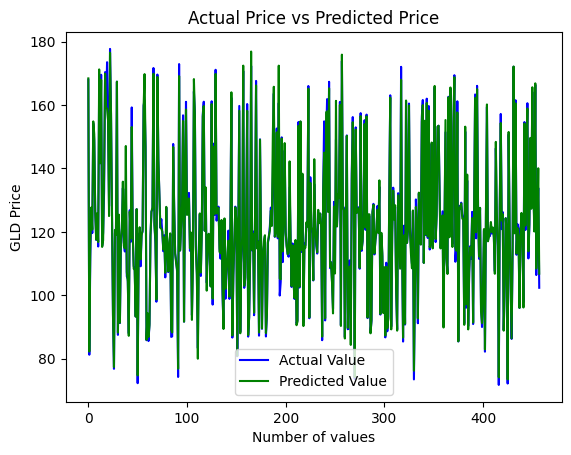

In [87]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()